## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Exploring given files to understand data contained within
#Import relevant libraries
#One file is a database and the others we will use are CSV

In [2]:
#EXPLORING THE DATABASE FILE
#Import libraries
import sqlite3
import pandas as pd

#Connect to the sqlite database
conn = sqlite3.connect('im.db')

with sqlite3.connect('im.db') as conn:
#Query and Fetch data

    cursor = conn.cursor()
    cursor.execute("""SELECT name FROM sqlite_master
    WHERE type = 'table';""")

#Fetch tables then print
    tables = cursor.fetchall()

    for table in tables:
     print(table)  

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


#The database file has 8 tables as depicted above
#Exploring tables
#Reading the tables into DataFrames

In [3]:
#Read relevant tables into DataFrames
basics_df = pd.read_sql_query(""" SELECT * FROM movie_basics""", conn)
ratings_df = pd.read_sql_query("""SELECT * FROM movie_ratings""", conn)

#Merge the relevant tables using the primary key i.e movie_id
merged_db_df = pd.merge(basics_df, ratings_df, on = 'movie_id', how = 'inner')

#Explore DataFrame
print(merged_db_df.head())

#Close database connection
conn.close()


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


#The merged DataFrame has 8 Columns
#Since the column movie_id has been taken common
#Printing them out to ascertain


In [4]:
#Check columns in the merged_db_df
column_names = merged_db_df.columns.tolist()

#print the names of the columns
for column in column_names:
    print(column)

movie_id
primary_title
original_title
start_year
runtime_minutes
genres
averagerating
numvotes


#Next, explore the CSV files
#Pandas is already imported

In [5]:
#Exploring the CSV files i.e bom, budgets
#Load the CSV files into a DataFrame
bom_df = pd.read_csv('bom.movie_gross.csv')
print(bom_df.head())



                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [6]:
budgets_df = pd.read_csv('tn.movie_budgets.csv')
print(budgets_df.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [7]:
print(merged_db_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


In [8]:
print(bom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [9]:
print(budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [10]:
#Check for duplicates
print("Duplicates in db_df:")
print(len(merged_db_df[merged_db_df.duplicated()]))

print("\nDuplicates in bom_df:")
print(len(bom_df[bom_df.duplicated()]))

print("\nDuplicates in budgets_df:")
print(len(budgets_df[budgets_df.duplicated()]))


Duplicates in db_df:
0

Duplicates in bom_df:
0

Duplicates in budgets_df:
0


#Checking for missing values in the data

In [11]:
#Check for missing values in db
missing_values_db = merged_db_df.isnull().sum()
missing_values_bom = bom_df.isnull().sum()
missing_values_budgets = budgets_df.isnull().sum()

print("Missing values in db_df:")
print(missing_values_db)

print("\nMissing values in bom_df:")
print(missing_values_bom)

print("\nMissing values in budgets_df:")
print(missing_values_budgets)


Missing values in db_df:
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Missing values in bom_df:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing values in budgets_df:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


#Handling the missing values in the data
#Drop the studio, domestic_gross and genres rows
#Fill the runtime and foreign_gross columns

In [12]:
#Drop the missing value rows
merged_db_df['genres'].dropna(inplace=True)
bom_df['studio'].dropna(inplace=True)
bom_df['domestic_gross'].dropna(inplace=True)

#Fill the runtime and foreign_gross
merged_db_df['runtime_minutes'] = merged_db_df['runtime_minutes'].fillna(merged_db_df['runtime_minutes'].mode())
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].mode())


#Checking for Outliers

In [18]:
#Checking for outliers
#runtime_minutes outliers
Q1 = merged_db_df['runtime_minutes'].quantile(0.25)
Q3 = merged_db_df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged_db_df[(merged_db_df['runtime_minutes'] < lower_bound) | 
                        (merged_db_df['runtime_minutes'] > upper_bound)]
outliers.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
20,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22
24,tt0283440,Short Time Heroes,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16


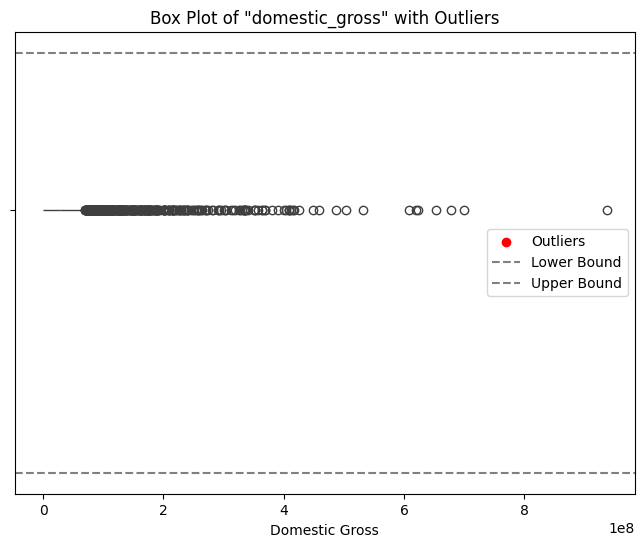

In [24]:
##Checking for outliers
#Calculate quartiles and IQR
Q1 = bom_df['domestic_gross'].quantile(0.25)
Q3 = bom_df['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=bom_df['domestic_gross'])

#Highlight potential outliers
plt.scatter([], [], c='red', label='Outliers')
plt.axhline(y=lower_bound, color='gray', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='gray', linestyle='--', label='Upper Bound')

#Add labels and title
plt.legend()
plt.xlabel('Domestic Gross')
plt.title('Box Plot of "domestic_gross" with Outliers')
plt.show()

#outliers = bom_df[(bom_df['domestic_gross'] < lower_bound) | (bom_df['domestic_gross'] > upper_bound)]
#outliers.head()